In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Question 1

To prove the Sigmoid function,
\
part a,

$$g(z) + g(-z)$$
$$= \frac{1}{1+e^{-z}} + \frac{1}{1+e^{z}} $$

$$= \frac{1+e^{z}+1+e^{-z}}{(1+e^{-z})(1+e^z)}$$

$$= \frac{2+e^{z}+e^{-z}}{2+e^{-z}+e^{z}}$$
$$=1$$

part(b),
$$g'(z) = \frac{d}{dz}\frac{1}{1+e^{-z}}$$

$$ \Rightarrow\frac{e^{-z}}{(1+e^{-z})^{2}}$$

$$ \Rightarrow\frac{1}{e^{-z}+e^{z}+2}$$
$$\Rightarrow\frac{1}{1+e^{-z}}\frac{1}{1+e^{z}}$$
$$\Rightarrow\ g(z)g(-z)$$

part(c)
we use the result from part(b),
$$ g'(-z) = g(-z)g(z) = g'(z)$$


part(d),
$$ g''(z) = \frac{d}{dz} g(z)g(-z)$$
$$ \Rightarrow\ g'(z)g(-z) - g(z)g'(-z)$$
$$\Rightarrow\ g(z)(g(-z))^{2} - g(z)(g(-z))^{2}$$
$$ \Rightarrow\ g(z)g(-z)[g(-z)-g(z)]$$

Question 2

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
final_df = df[df['class']!='Iris-virginica']

/Users/cheukyinyu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


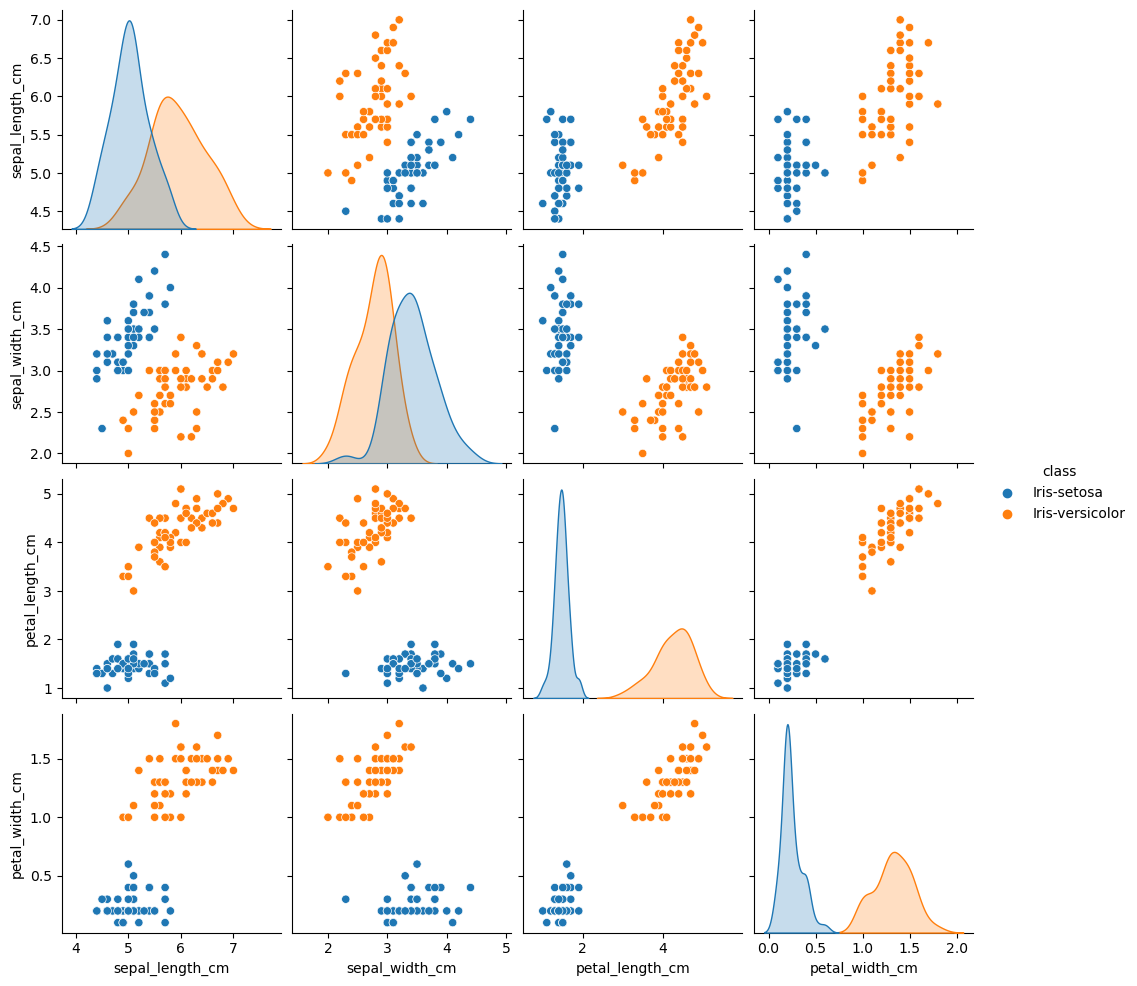

In [4]:
sns.pairplot(final_df, hue='class', height=2.5)

/Users/cheukyinyu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


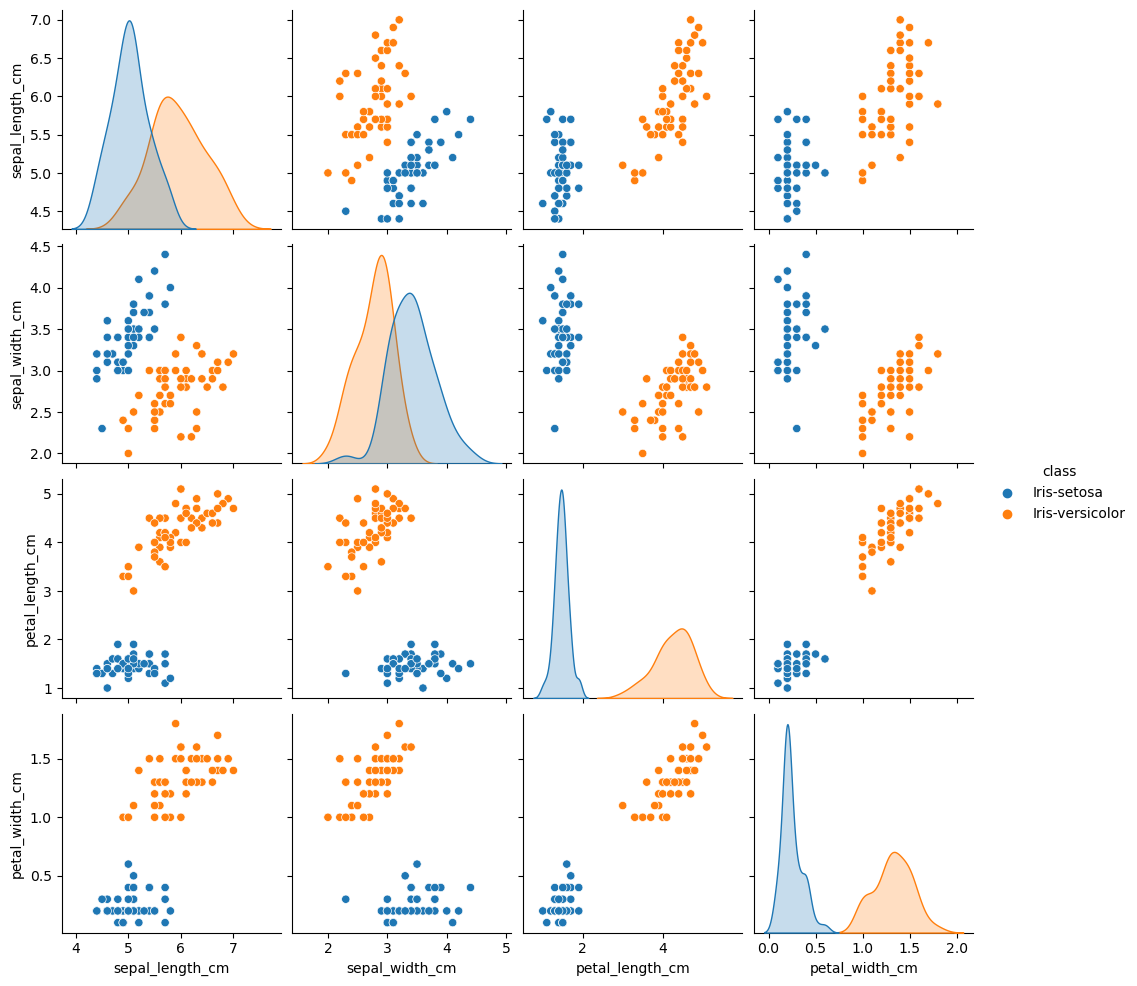

In [5]:
sns.pairplot(final_df, hue='class', height=2.5)

array([[<Axes: title={'center': 'sepal_length_cm'}>]], dtype=object)

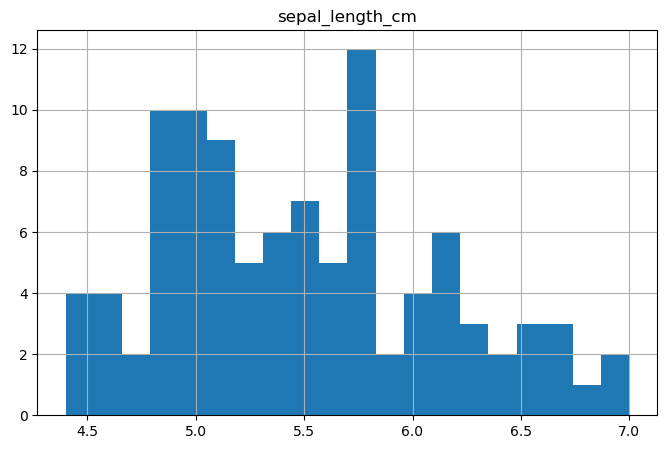

In [6]:
final_df.hist(column = 'sepal_length_cm', bins=20, figsize=(8,5))

In [7]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"],[1,0],inplace=True)

/var/folders/n2/ww7h0chn7jlf63zwj2g5k9sc0000gn/T/ipykernel_4386/114757725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['class'].replace(["Iris-setosa","Iris-versicolor"],[1,0],inplace=True)


In [8]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.3, random_state=42)

In [9]:
X_tr_arr = X_train
print('Training Input Shape', (X_tr_arr.shape))
X_ts_arr = X_test
print('Testing Input Shape', (X_ts_arr.shape))
y_tr_arr = y_train.values
print('Training Output Shape', (y_tr_arr.shape))
y_ts_arr = y_test.values
print('Testing Output Shape', (y_ts_arr.shape))

Training Input Shape (70, 4)
Testing Input Shape (30, 4)
Training Output Shape (70, 1)
Testing Output Shape (30, 1)


In [10]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = (np.tanh(result/2)+1)/2
    return final_result

In [11]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]

    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    cost = -(1/m)*(np.sum((Y.T*np.log(final_result)) + (1-Y.T)*(np.log(1-final_result))))

    dw = (1/m)*(np.dot(X.T,(final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))

    grads = {"dw": dw, "db": db}

    return grads, cost

In [12]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):

        grads, cost = model_optimize(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * (dw.T)
        b = b - learning_rate * db

        if (i % 1000 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))

    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

In [13]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [14]:
n_features = X_tr_arr.shape[1]
print('number of features', n_features)
w, b = weightInitialization(n_features)

number of features 4


In [15]:
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01, no_iterations=10000)
costs_tr = costs

Cost after 0 iteration is 0.693147
Cost after 1000 iteration is 0.051068
Cost after 2000 iteration is 0.027257
Cost after 3000 iteration is 0.018872
Cost after 4000 iteration is 0.014549
Cost after 5000 iteration is 0.011897
Cost after 6000 iteration is 0.010097
Cost after 7000 iteration is 0.008792
Cost after 8000 iteration is 0.007801
Cost after 9000 iteration is 0.007021


In [16]:
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

Optimized weights [[-1.1329834   1.60977792 -2.09053532 -2.14953509]]
Optimized intercept -0.2512582333167958


In [17]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
#y_tr_pred.reshape(1,66)
#y_tr_arr.reshape(66,1)
print('Training data', sum(sum(y_tr_arr)))
print('Training prediction', sum(sum(y_tr_pred)))

Training data 33
Training prediction 33.0


In [18]:
y_ts_pred = predict(final_test_pred, m_ts)
y_ts_pred.reshape(1,30)
y_ts_arr.reshape(30,1)
print(y_ts_pred)
print(y_ts_arr.T)
print('Testing Accuracy', np.dot(y_ts_pred, y_ts_arr))

[[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  0. 1. 1. 0. 1. 0.]]
[[0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0]]
Testing Accuracy [[17.]]


In [19]:
# Gradient descent test
coeff, gradient, costs = model_predict(w, b, X_ts_arr, y_ts_arr, learning_rate=0.01, no_iterations=10000)
costs_ts = costs

Cost after 0 iteration is 0.003435
Cost after 1000 iteration is 0.003187


Cost after 2000 iteration is 0.002973
Cost after 3000 iteration is 0.002787
Cost after 4000 iteration is 0.002623
Cost after 5000 iteration is 0.002479
Cost after 6000 iteration is 0.002350
Cost after 7000 iteration is 0.002234
Cost after 8000 iteration is 0.002129
Cost after 9000 iteration is 0.002034


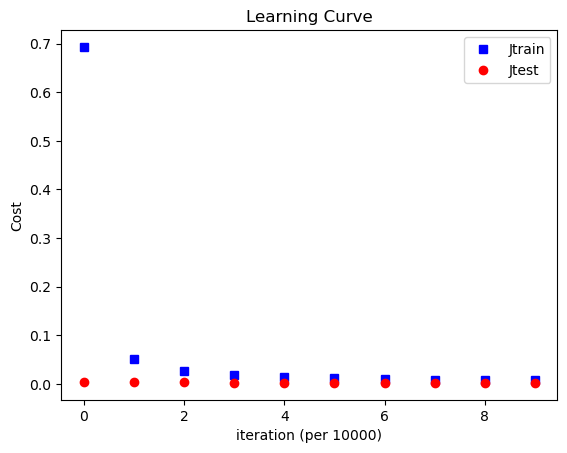

In [20]:
plt.plot(costs_tr, 'bs', label='Jtrain')
plt.plot(costs_ts, 'ro', label='Jtest')
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.ylabel('Cost')
plt.xlabel('iteration (per 10000)')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

Question 3
Away from half filled

logistic regression

We test the case for N = 30 and compare N = 200 in below 

In [21]:
N = 30
mu=-1

In [22]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta,iterations=1000):
        alpha=0.1
        I=int(iterations/20)
        for it in range(iterations):
            if it % I == -1:
              alpha/=2
            theta=theta-alpha*self.gradient(theta, x, y)
        self.w_ = theta[:,0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [23]:
def logistic_regression_model(N, mu, n_itr=50000):
    # Generate kx_list and ky_list
    kx_list = np.pi * np.random.random((N, 1))
    ky_list = np.pi * np.random.random((N, 1))

    # Calculate E and occupancy
    E = [-2 * (np.cos(kx_list[i]) + np.cos(ky_list[i])) for i in range(N)]
    occupancy = [E[i] <= mu for i in range(N)]

    # Generate X and y
    X = np.column_stack([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2, kx_list[:,0]*ky_list[:,0]])
    y = np.where(occupancy, 1., 0.).reshape((N, 1))

    # Add bias term to X
    X_b = np.c_[np.ones((len(X), 1)), X]

    # Initialize theta
    theta = np.zeros((X_b.shape[1], 1))

    # Train the model
    model1 = LogisticRegressionUsingGD()
    model1.fit(X_b, y, theta, n_itr)

    # Calculate accuracy
    accuracy = model1.accuracy(X_b, y.flatten())

    # Get parameters
    parameters = model1.w_

  
    return accuracy, parameters

In [24]:

print("the The accuracy of the model is {}".format(logistic_regression_model(30, mu, 50000)[0]))
print("the The accuracy of the model is {}".format(logistic_regression_model(200, mu, 50000)[0]))
print("The parameters of the model are {}".format(logistic_regression_model(30, mu, 50000)[1]))
print("The parameters of the model are {}".format(logistic_regression_model(200, mu, 50000)[1]))

the The accuracy of the model is 100.0
the The accuracy of the model is 100.0
The parameters of the model are [13.53319544  5.1504459   7.22888561 -7.10844018 -6.58245223 -2.32455365]
The parameters of the model are [15.40314509  6.05362678  6.87469337 -6.26351355 -6.7499863  -5.49169446]


/var/folders/n2/ww7h0chn7jlf63zwj2g5k9sc0000gn/T/ipykernel_4386/586949338.py:12: RuntimeWarning: invalid value encountered in arccos
  y_plot = np.arccos(-mu/2-np.cos(x_plot))


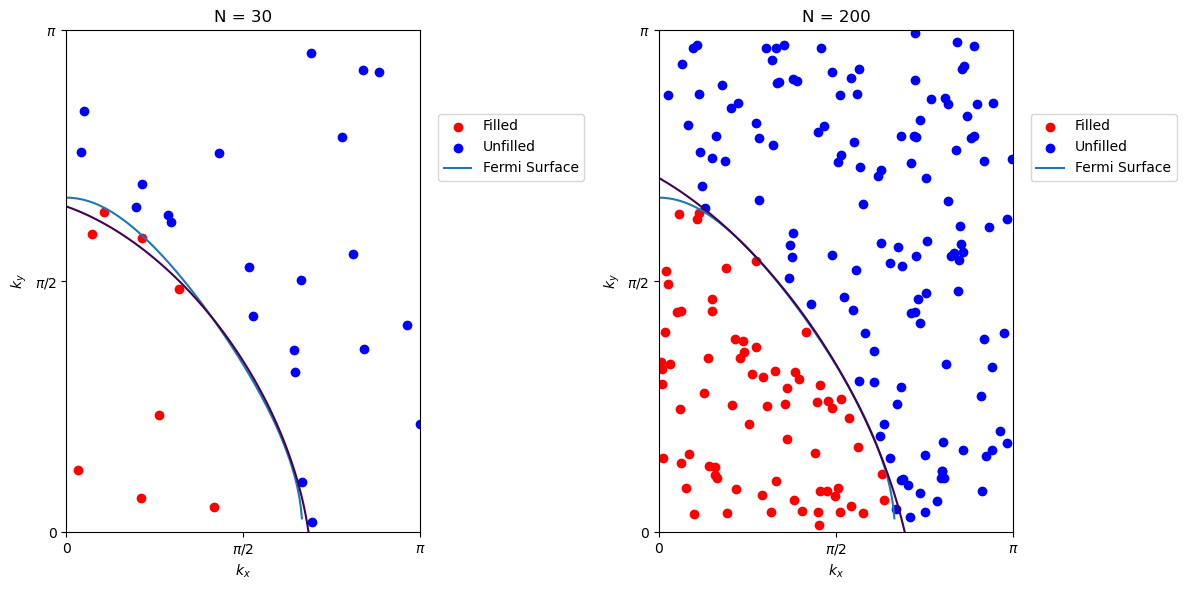

In [25]:
def plot_for_N(N):
    # Your code to calculate kx_list, ky_list, occupancy, parameters, etc. for the given N
    kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
    ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
    
    E=[float(-2*(np.cos(kx_list[i])+np.cos(ky_list[i]))) for i in range(N)]

    occupancy=[E[i]<=mu for i in range(N)]  
    parameters = logistic_regression_model(N, mu, 50000)[1]

    x_plot = np.arange(0, np.pi, 0.01)
    y_plot = np.arccos(-mu/2-np.cos(x_plot))
    [XX,YY] = np.meshgrid(x_plot, x_plot)

    plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r', label='Filled')
    plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b', label='Unfilled')
    plt.plot(x_plot, y_plot, label='Fermi Surface')
    plt.contour(XX, YY, parameters[0] + parameters[1]*XX + parameters[2]*YY + parameters[3]*XX**2 + parameters[4]*YY**2 + parameters[5]*XX*YY, [0])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_for_N(30)
plt.title('N = 30')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.legend(loc=(1.05,0.7))

plt.subplot(1, 2, 2)
plot_for_N(200)
plt.title('N = 200')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.legend(loc=(1.05,0.7))

plt.tight_layout()
plt.show()

We can see that, after we boost the N = 200, the accuracy of the data decrease, but the parameter is higher.
We do the same for SVM and compare the two method.

SVM

In [26]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [27]:
def hinge_st(xi, yi, theta):
    '''
    xi    = single example features
    yi    = single example target
    theta = Vector of thetas

    Returns the hinge loss for the single example
    '''
    pred = 1 - yi * (xi.dot(theta))
    loss = np.maximum(0, pred)
    return loss

def computeCost_st(X, y, theta):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas 

    Returns the cost for given X and Y. The following shows and example of a single dimensional X
    '''
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.maximum(0, 1 - y*predictions))
    return cost



In [28]:
def check_st(xi, yi, theta):
    '''
    xi    = single example features
    yi    = single example target
    theta = Vector of thetas

    Returns 1 if the example is misclassified and 0 otherwise
    '''
    fx = yi * (xi.dot(theta))

    return 1 if fx < 1 else 0



In [29]:
def stochastic_gradient_descent(X, y, theta, iterations):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    X_b = np.c_[np.ones((len(X),1)),X]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)

    for it in range(iterations):
        if it % I == -1:
            alpha /= 2

        # Randomly select 1 data point
        i = np.random.randint(m)
        xi = X_b[i:i+1]
        yi = y[i:i+1]

        theta = theta + alpha*((np.multiply(check_st(xi,yi,theta),yi)).T.dot(xi)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m

        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost_st(X_b,y,theta)

    return theta, cost_history, theta_history

In [30]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

In [31]:
def subgradient_descent(X,y,theta,iterations):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
          alpha/=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)

    return theta, cost_history, theta_history

In [32]:

def svm_model(N, mu, n_iter=50000):
    # Generate kx_list and ky_list
    kx_list = np.pi * np.random.random((N, 1))
    ky_list = np.pi * np.random.random((N, 1))

    # Calculate E and occupancy
    E = [-2 * (np.cos(kx_list[i]) + np.cos(ky_list[i])) for i in range(N)]
    occupancy = [E[i] <= mu for i in range(N)]

    # Generate X and y
    X = np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2, kx_list[:,0]*ky_list[:,0]])
    X = X.T
    y = np.where(occupancy, 1., -1.).reshape((N,1))
    
 
    # Initialize theta
    theta = np.zeros((X.shape[1]+1, 1))



    
    theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter)

   

    return cost_history, theta_history, theta

In [33]:
print("the final cost of N=30 is {}".format(svm_model(30, mu, 50000)[0][-1]))
print("the final cost of N=200 is {}".format(svm_model(200, mu, 50000)[0][-1]))
print("the theta is {}".format(svm_model(30, mu, 50000)[1][-1]))
print("the theta is {}".format(svm_model(200, mu, 50000)[1][-1]))

the final cost of N=30 is 0.3127718542420291
the final cost of N=200 is 3.2412579406273547
the theta is [12.4        -1.93594236 -0.41631027 -1.97383431 -1.91909682 -3.77033073]
the theta is [47.8        -3.01158704 -1.66892282 -8.75701121 -9.26473562 -3.81705023]


We can see that the final cost is bigger when N is larger.

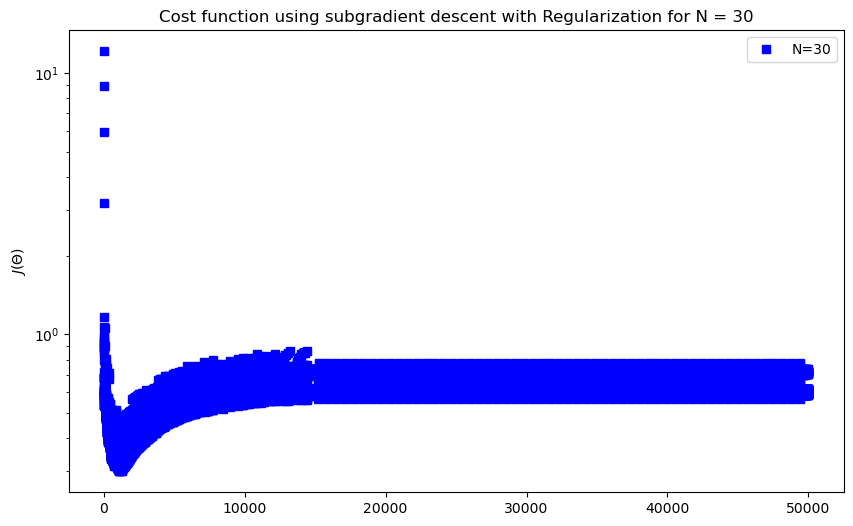

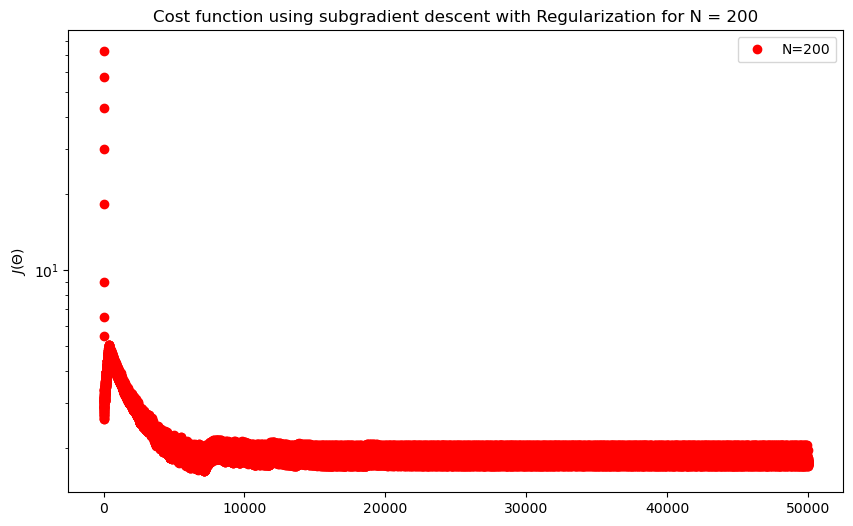

In [34]:
# Plot for N=30
plt.figure(figsize=(10, 6))
plt.plot(svm_model(30, mu, 50000)[0], 'bs', label='N=30')
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using subgradient descent with Regularization for N = 30")
plt.yscale('log')
plt.legend()
plt.show()

# Plot for N=200
plt.figure(figsize=(10, 6))
plt.plot(svm_model(200, mu, 50000)[0], 'ro', label='N=200')
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using subgradient descent with Regularization for N = 200")
plt.yscale('log')
plt.legend()
plt.show()

We can say that when N is larger, the fluctuation is smaller, which is more stable. Therefore, in SVM, we can clearly see the difference between the N.

/var/folders/n2/ww7h0chn7jlf63zwj2g5k9sc0000gn/T/ipykernel_4386/1611170587.py:21: RuntimeWarning: invalid value encountered in arccos
  y_plot = np.arccos(-mu/2-np.cos(x_plot))


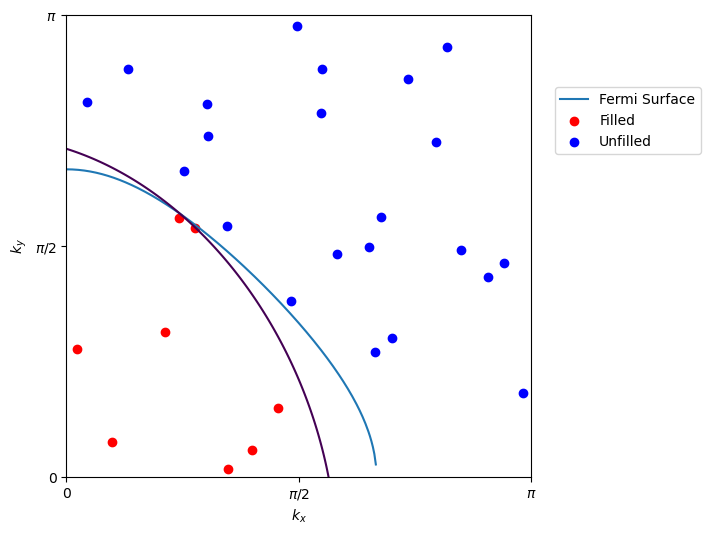

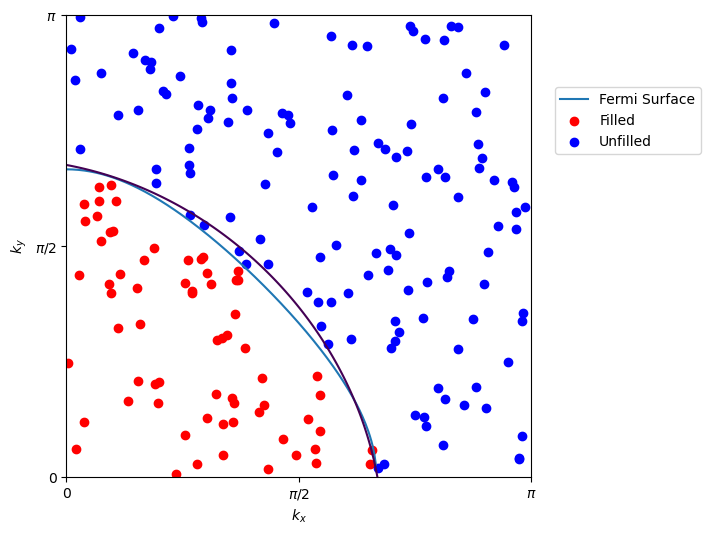

In [35]:
def plot_decision_boundary(N, mu):
    # Train the model 

    
 

    # Generate kx_list and ky_list
    kx_list = np.pi * np.random.random((N, 1))
    ky_list = np.pi * np.random.random((N, 1))
    


    # Calculate E and occupancy
    E = [-2 * (np.cos(kx_list[i]) + np.cos(ky_list[i])) for i in range(N)]
    occupancy = [E[i] <= mu for i in range(N)]
    theta = svm_model(N, mu, 50000)[2] 
 

    # Generate the plot
    x_plot = np.arange(0, np.pi, 0.01)
    y_plot = np.arccos(-mu/2-np.cos(x_plot))
    [XX,YY] = np.meshgrid(x_plot, x_plot)
    plt.figure(figsize=(6,6))
    plt.plot(x_plot, y_plot, label='Fermi Surface')
    plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r', label='Filled')
    plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b', label='Unfilled')
    plt.contour(XX, YY, theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX**2+theta[4]*YY**2+theta[5]*XX*YY, [0])
    plt.legend(loc=(1.05,0.7))
    plt.xlim(0, np.pi)
    plt.ylim(0, np.pi)
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.show()

# Call the function for N=30 and N=200
plot_decision_boundary(30, mu)
plot_decision_boundary(200, mu)

3(b)

In [36]:
def svm_model_X2(N, mu, n_iter=50000):
    # Generate kx_list and ky_list
    kx_list = np.pi * np.random.random((N, 1))
    ky_list = np.pi * np.random.random((N, 1))

    # Calculate E and occupancy
    E = [-2 * (np.cos(kx_list[i]) + np.cos(ky_list[i])) for i in range(N)]
    occupancy = [E[i] <= mu for i in range(N)]

    # Generate X_2 and y
    X_2 = np.array((kx_list[:,0]+ky_list[:,0],kx_list[:,0]**2+ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]))
    X_2 = X_2.T
    y = np.where(occupancy, 1., -1.).reshape((N,1))

    # Initialize theta_2
    theta_2 = np.random.random((X_2.shape[1]+1, 1))

    theta_2,cost_history,theta_history = subgradient_descent(X_2,y,theta_2,n_iter)

    return cost_history, theta_2

def svm_model_X(N, mu, n_iter=50000):
    # Generate kx_list and ky_list
    kx_list = np.pi * np.random.random((N, 1))
    ky_list = np.pi * np.random.random((N, 1))

    # Calculate E and occupancy
    E = [-2 * (np.cos(kx_list[i]) + np.cos(ky_list[i])) for i in range(N)]
    occupancy = [E[i] <= mu for i in range(N)]

    # Generate X and y
    X = np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2, kx_list[:,0]*ky_list[:,0]])
    y = np.where(occupancy, 1., -1.).reshape((N,1))

    # Initialize theta
    theta = np.random.random((X.shape[0]+1, 1))

    theta,cost_history,theta_history = subgradient_descent(X.T,y,theta,n_iter)

    return cost_history, theta

In [37]:
print(svm_model_X2(200, mu, 50000)[0][-1])
print(svm_model_X(200, mu, 50000)[0][-1])

0.9994205843359424
0.5284843704625609


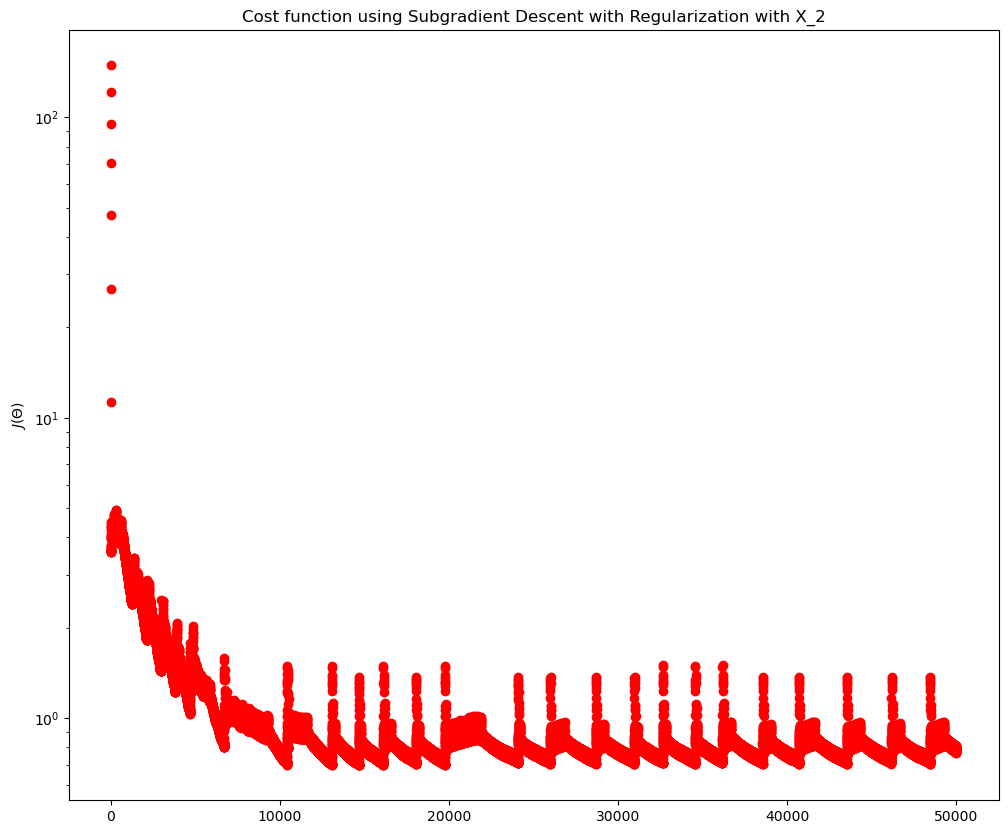

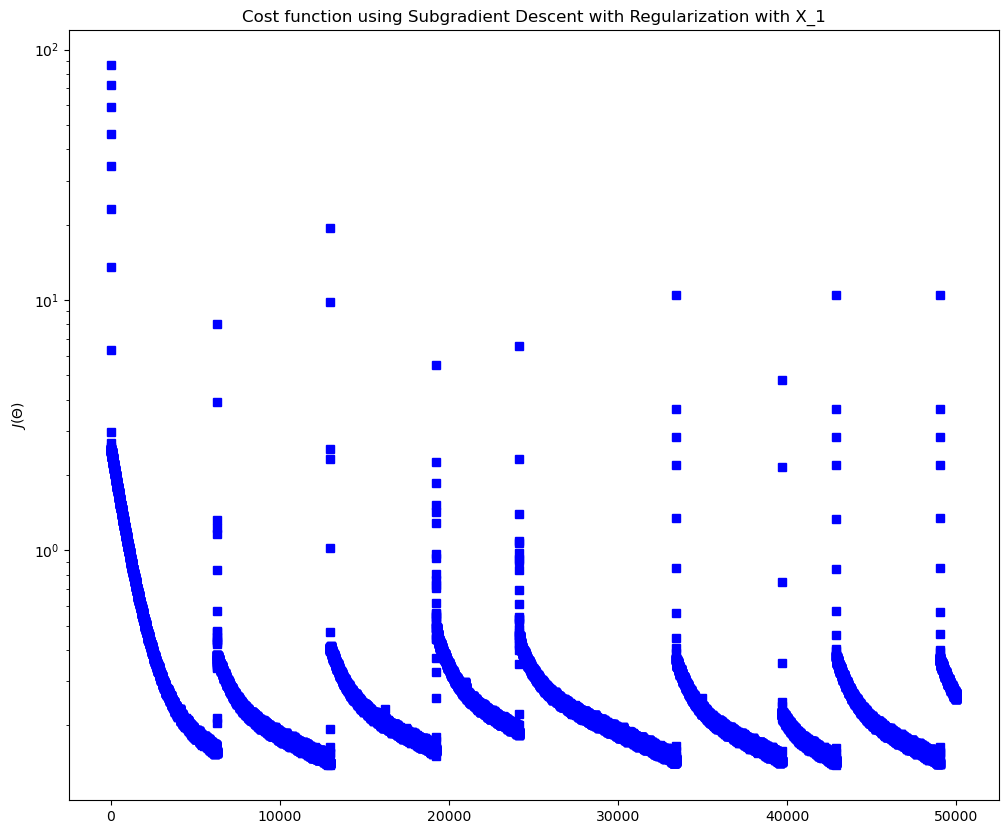

In [38]:
plt.plot(svm_model_X2(200, mu, 50000)[0], 'ro', label='X_2')
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Subgradient Descent with Regularization with X_2")
plt.yscale('log')
plt.show()

plt.plot(svm_model_X(200, mu, 50000)[0], 'bs', label='X')
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Subgradient Descent with Regularization with X_1")
plt.yscale('log')
plt.show()

We can say there is less fluctration for X2, so,X2 is a better feature.

/var/folders/n2/ww7h0chn7jlf63zwj2g5k9sc0000gn/T/ipykernel_4386/598404381.py:7: RuntimeWarning: invalid value encountered in arccos
  y_plot = np.arccos(-mu/2-np.cos(x_plot))


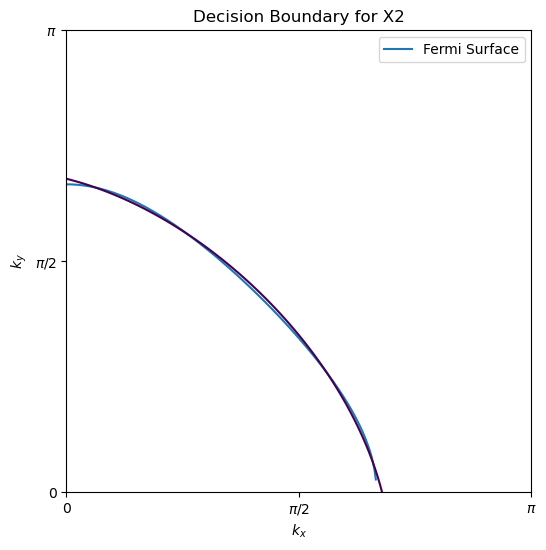

/var/folders/n2/ww7h0chn7jlf63zwj2g5k9sc0000gn/T/ipykernel_4386/598404381.py:28: RuntimeWarning: invalid value encountered in arccos
  y_plot = np.arccos(-mu/2-np.cos(x_plot))


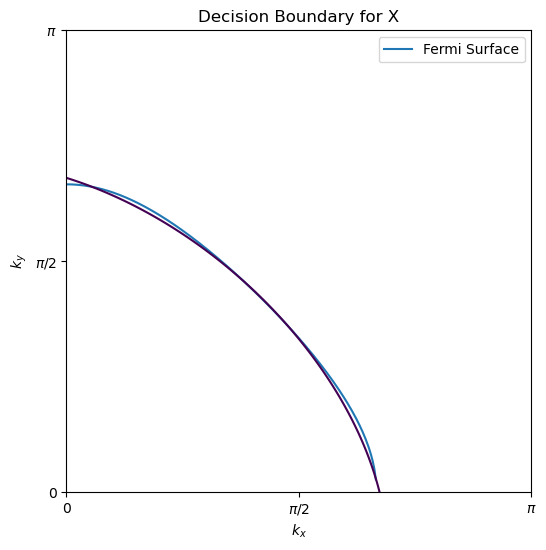

In [39]:
def plot_decision_boundary_X2(N, mu):
    # Train the model
    _, theta_2 = svm_model_X2(N, mu)

    # Generate the plot
    x_plot = np.arange(0, np.pi, 0.01)
    y_plot = np.arccos(-mu/2-np.cos(x_plot))
    [XX,YY] = np.meshgrid(x_plot, x_plot)
    plt.figure(figsize=(6,6))
    plt.title('Decision Boundary for X2')
    plt.plot(x_plot, y_plot, label='Fermi Surface')
    plt.contour(XX, YY, theta_2[0]+theta_2[1]*(XX+YY)+theta_2[2]*(XX**2+YY**2)+theta_2[3]*XX*YY, [0])
    plt.xlim(0, np.pi)
    plt.ylim(0, np.pi)
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.legend()
    plt.show()

def plot_decision_boundary_X(N, mu):
    # Train the model
    _, theta = svm_model_X(N, mu)

    # Generate the plot
    x_plot = np.arange(0, np.pi, 0.01)
    y_plot = np.arccos(-mu/2-np.cos(x_plot))
    [XX,YY] = np.meshgrid(x_plot, x_plot)
    plt.figure(figsize=(6,6))
    plt.title('Decision Boundary for X')
    plt.plot(x_plot, y_plot, label='Fermi Surface')
    plt.contour(XX, YY, theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX**2+theta[4]*YY**2+theta[5]*XX*YY, [0])
    plt.xlim(0, np.pi)
    plt.ylim(0, np.pi)
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    plt.legend()
    plt.show()

# Call the functions
plot_decision_boundary_X2(5000, mu)
plot_decision_boundary_X(5000, mu)